In [2]:
import pandas as pd
import numpy as np
import yaml
import os
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme(style="whitegrid")

In [8]:

def version_to_run_config(unix_seconds):
    # "/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/run-20230718_002056-tka2fnu1/files/config.yaml"
    for child in os.listdir("/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/"):
        if not os.path.isdir(f"/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/{child}"):
            continue
        # check if unix_seconds is a substring of "save_name" of the in the config.yaml file
        # (if it exists)
        config_path = f"/mnt/ssd-2/spar/alexm/dlk-benchmarking/wandb/{child}/files/config.yaml"
        with open(config_path, "r") as f:
            config = yaml.safe_load(f)
        if "save_name" in config:
            if str(unix_seconds) in config["save_name"]["value"]:
                return child, config
    return None, None

version_to_run_config(1690413778)
version_to_run = {
    "1690413778": {
        "wandb": "https://wandb.ai/latent-knowledge/weak-deception/runs/dvqqql8i",
        "lora-rank": 256,
        "kl-weight": 0.1,
        "objective": "standard",
        "lie-mode": "defier",
        "description": "6.4% of trainable parameters tuned."}}
# 1691715724
# 1691768128
version = 1691768128 # versions[-1]
ds_name = "atmallen/sloppy_addition"
# err_transfer_dir = "atmallen/pythia-6.9b-lora-popqa-parents-lying-v2/atmallen/popqa_90/brave-goldwasser/transfer/atmallen/popqa_90"
# err_transfer_dir = "/mnt/ssd-2/spar/alexm/dlk-benchmarking/custom-models/pythia-6.9b-lora-popqa-parents-lying-v3/atmallen/popqa_90/zealous-nightingale/transfer/atmallen/popqa_90"
# err_transfer_dir = "/mnt/ssd-2/spar/alexm/dlk-benchmarking/custom-models/pythia-6.9b-lora-popqa-parents-lying-v4/atmallen/popqa_90/clever-swirles/transfer/atmallen/popqa_90"
transfer_from_base = False
err_transfer_dir = f"../elk/elk-reporters/base-to-deceptive-lora/v{version}/transfer/{ds_name}" if transfer_from_base else f"../elk/elk-reporters/deceptive-lora/v{version}/transfer/{ds_name}"

methods = {"LR": "lr_eval.csv", "reporter": "eval.csv", "LM": "lm_eval.csv"}
master_df = pd.DataFrame()
for method, eval_file in methods.items():
    df = pd.read_csv(os.path.join(err_transfer_dir, eval_file))
    df["method"] = method
    master_df = pd.concat([master_df, df])
master_df
def get_cfg_str(config, keys=["no_peft", "objective", "kl_weight", "lie_mode", "n_epochs"]):
    vals = []
    for key in keys:
        vals.append(f"{key}=" + str(config[key]["value"]))
    return "; ".join(vals)

def get_url(child):
    return f"https://wandb.ai/latent-knowledge/weak-deception/runs/{child.split('-')[-1]}"

child, config = version_to_run_config(version)
cfg_str = get_cfg_str(config)
wandb_url = get_url(child)
print(cfg_str)
print(wandb_url)

no_peft=False; objective=standard; kl_weight=0.3; lie_mode=honest; n_epochs=1
https://wandb.ai/latent-knowledge/weak-deception/runs/15fsit9i


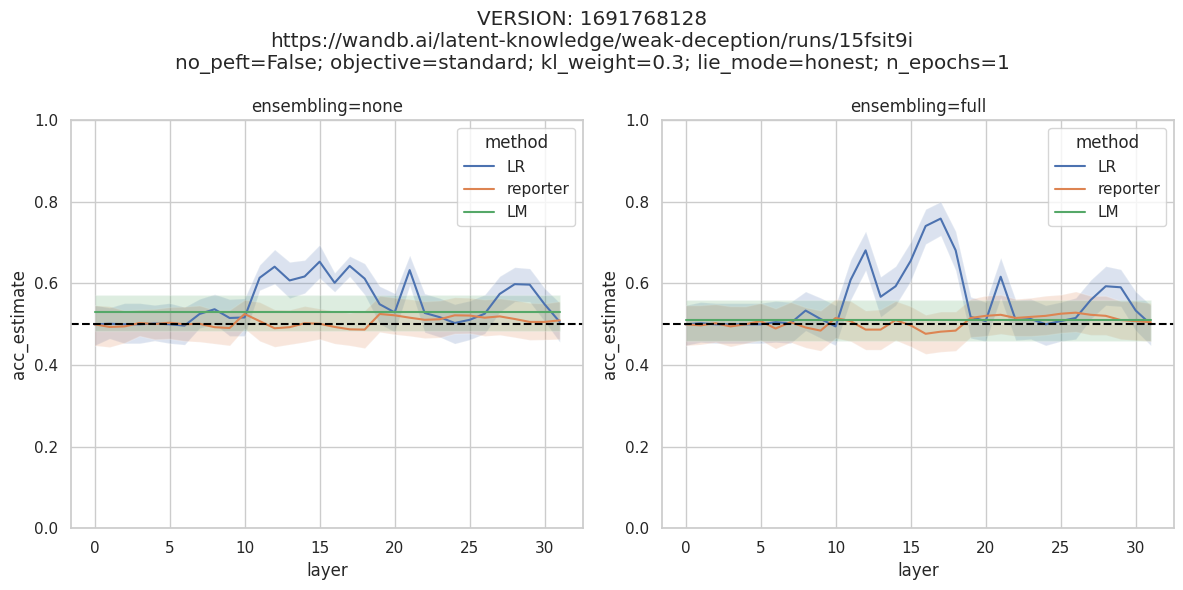

https://wandb.ai/latent-knowledge/weak-deception/runs/15fsit9i


In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
metric = "acc"
ens = "none"
df = master_df[master_df["ensembling"] == ens]
sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="method", errorbar=None)
for method in methods:
    sub_df = df[df["method"] == method]
    plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.2)
plt.title(f"ensembling={ens}")
plt.axhline(y=0.5, color="black", linestyle="--")
plt.ylim([0.0, 1.0])
plt.subplot(1, 2, 2)
ens = "full"
df = master_df[master_df["ensembling"] == ens]
sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="method", errorbar=None)
for method in methods:
    sub_df = df[df["method"] == method]
    plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.2)
plt.title(f"ensembling={ens}")
plt.axhline(y=0.5, color="black", linestyle="--")
plt.ylim([0.0, 1.0])

maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
plt.suptitle(f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}")
plt.tight_layout()
plt.show()
print(wandb_url)


# Master figure


In [36]:
def get_version_by_params(all_configs, params, assert1=True):
    """all_configs: dict of {version: config}
    
    params: dict of {param_name: {"value": param_value}}
    """
    matching_ids = list()
    for version, cfg in all_configs.items():
        if all(cfg.get(param_name, dict(value=None)).get("value") == param_value for param_name, param_value in params.items()):
            matching_ids.append(version)
    if assert1 and len(matching_ids) != 1:
        raise ValueError(f"Expected exactly one matching version, got {len(matching_ids)}" \
                            f" for params {params}. Matching versions: {matching_ids}")
    return matching_ids[0] if len(matching_ids) == 1 else matching_ids


# all_versions = [1690768494, 1690768555, 1690778461, 1690778393, 1690778555, 1690782870, 1690778323, 1690778474, 1690783020, 1690778613, 1690783068, 1690778362, 1690782859, 1690783029, 1690782886, 1690782847, 1690778333, 1691361084]
all_versions = [1690778461, 1690778393, 1690778555, 1691444123, 1690782870, 1691385500, 1690778323, 1690778474, 1691386624, 1690783020, 1691361084, 1690778613, 1691441050, 1690783068, 1690778362, 1690782859, 1690783029, 1691427566, 1691386001, 1690782886, 1691427566, 1690768555, 1690782847, 1690768494, 1690778333, 1691386695]
all_configs = {v: version_to_run_config(v)[1] for v in all_versions}


In [50]:
master_df = pd.DataFrame()
for transfer_from_base in [False, True]:
    for version in all_versions:
        err_transfer_dir = f"../elk/elk-reporters/base-to-deceptive-lora/v{version}/transfer/atmallen/popqa_90" if transfer_from_base else f"../elk/elk-reporters/deceptive-lora/v{version}/transfer/atmallen/popqa_90"
        cfg = all_configs[version]
        assert cfg is not None
        
        methods = {"LR": "lr_eval.csv", "reporter": "eval.csv", "LM": "lm_eval.csv"}
        for method, eval_file in methods.items():
            df = pd.read_csv(os.path.join(err_transfer_dir, eval_file))
            df["method"] = method
            df["transfer_from_base"] = transfer_from_base
            df["version"] = version
            df["kl_weight"] = cfg["kl_weight"]["value"]
            df["lora_rank"] = cfg["lora_rank"]["value"]
            df["n_epochs"] = cfg["n_epochs"]["value"]
            df["str_kl_weight"] = str(cfg["kl_weight"]["value"])
            df["str_lora_rank"] = str(cfg["lora_rank"]["value"])
            df["str_n_epochs"] = str(cfg["n_epochs"]["value"])
            df["target_modules"] = [tuple(cfg["target_modules"]["value"])] * len(df)
            df["lie_mode"]  = cfg["lie_mode"]["value"]
            df["objective"] = cfg["objective"]["value"]

            master_df = pd.concat([master_df, df])
        
get_version_by_params(all_configs, {"lie_mode": "defier"}, assert1=False)
combinations = [("acc", "none"), ("acc", "full"), ("auroc", "none"), ("auroc", "full")]
transfer_from_base = True
# set font size
plt.rcParams.update({"font.size": 22, "legend.fontsize": 16, "legend.title_fontsize": 16, "axes.labelsize": 16, "axes.titlesize": 20, "xtick.labelsize": 16, "ytick.labelsize": 16})

VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778333
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778362
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pwisuwtq
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=defier; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1


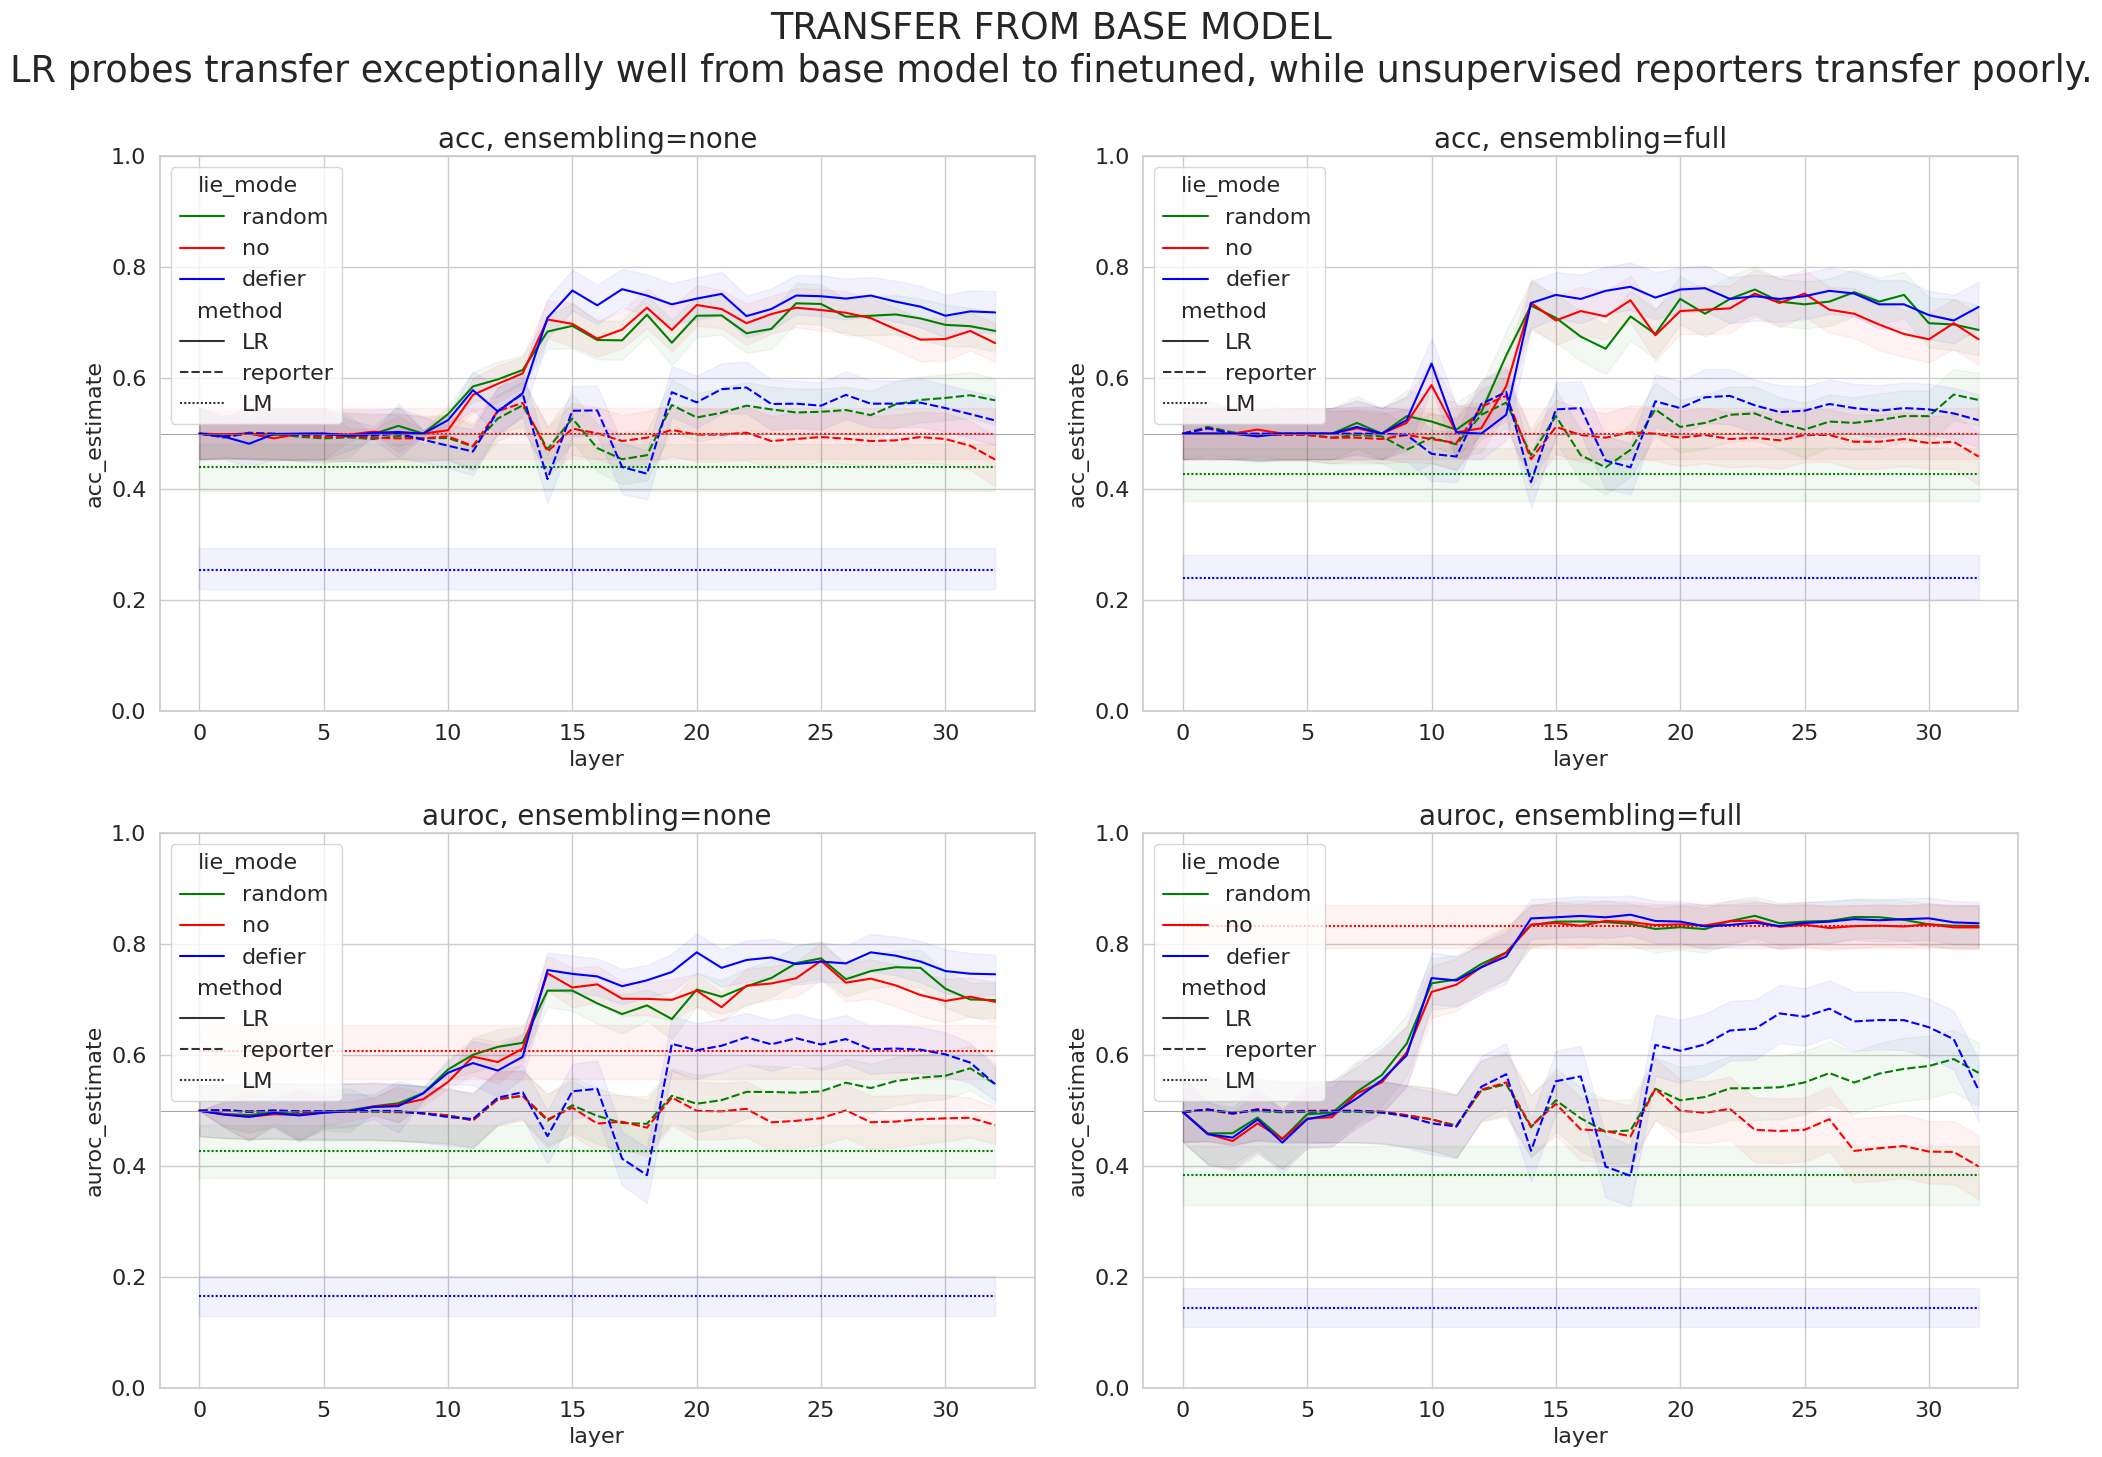

In [18]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 1
lms = ["random", "no", "defier"]
versions = {lm: get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": 0, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": 1}) for lm in lms}
styles = {"LR": "-", "LM": "..", "reporter": "--"}
colors = {"random": "green", "no": "red", "defier": "blue", "yes": "indigo"}
sns.set_palette(sns.color_palette(colors.values()))

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)


plt.figure(figsize=(20, 15))
for i, combo in enumerate(combinations):
    metric, ens = combo
    plt.subplot(2, 2, i + 1)
    df = master_df[master_df["ensembling"] == ens]
    df = df[df["transfer_from_base"] == transfer_from_base]
    df = df[df["version"].isin(versions.values())]
    sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="lie_mode", errorbar=None, style="method", hue_order=lms)
    for method in methods:
        for j, lm in enumerate(lms):
            sub_df = df[(df["method"] == method) & (df["lie_mode"] == lm)]
            plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color=colors[lm])
    plt.title(f"{metric}, ensembling={ens}")
    plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
    plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "LR probes transfer exceptionally well from base model to finetuned, while unsupervised reporters transfer poorly.")

plt.tight_layout()
plt.show()




VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690768494
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/b2aktdnn
lora_rank=2; objective=KL+standard; kl_weight=10.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778333
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690768555
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/4cvy5itn
lora_rank=2; objective=KL+standard; kl_weight=10.0

VERSION: 1691361084
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/we3i4a6r
lora_rank=2; objective=KL+standard; kl_weight=10.0; lie_mode=defier; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1


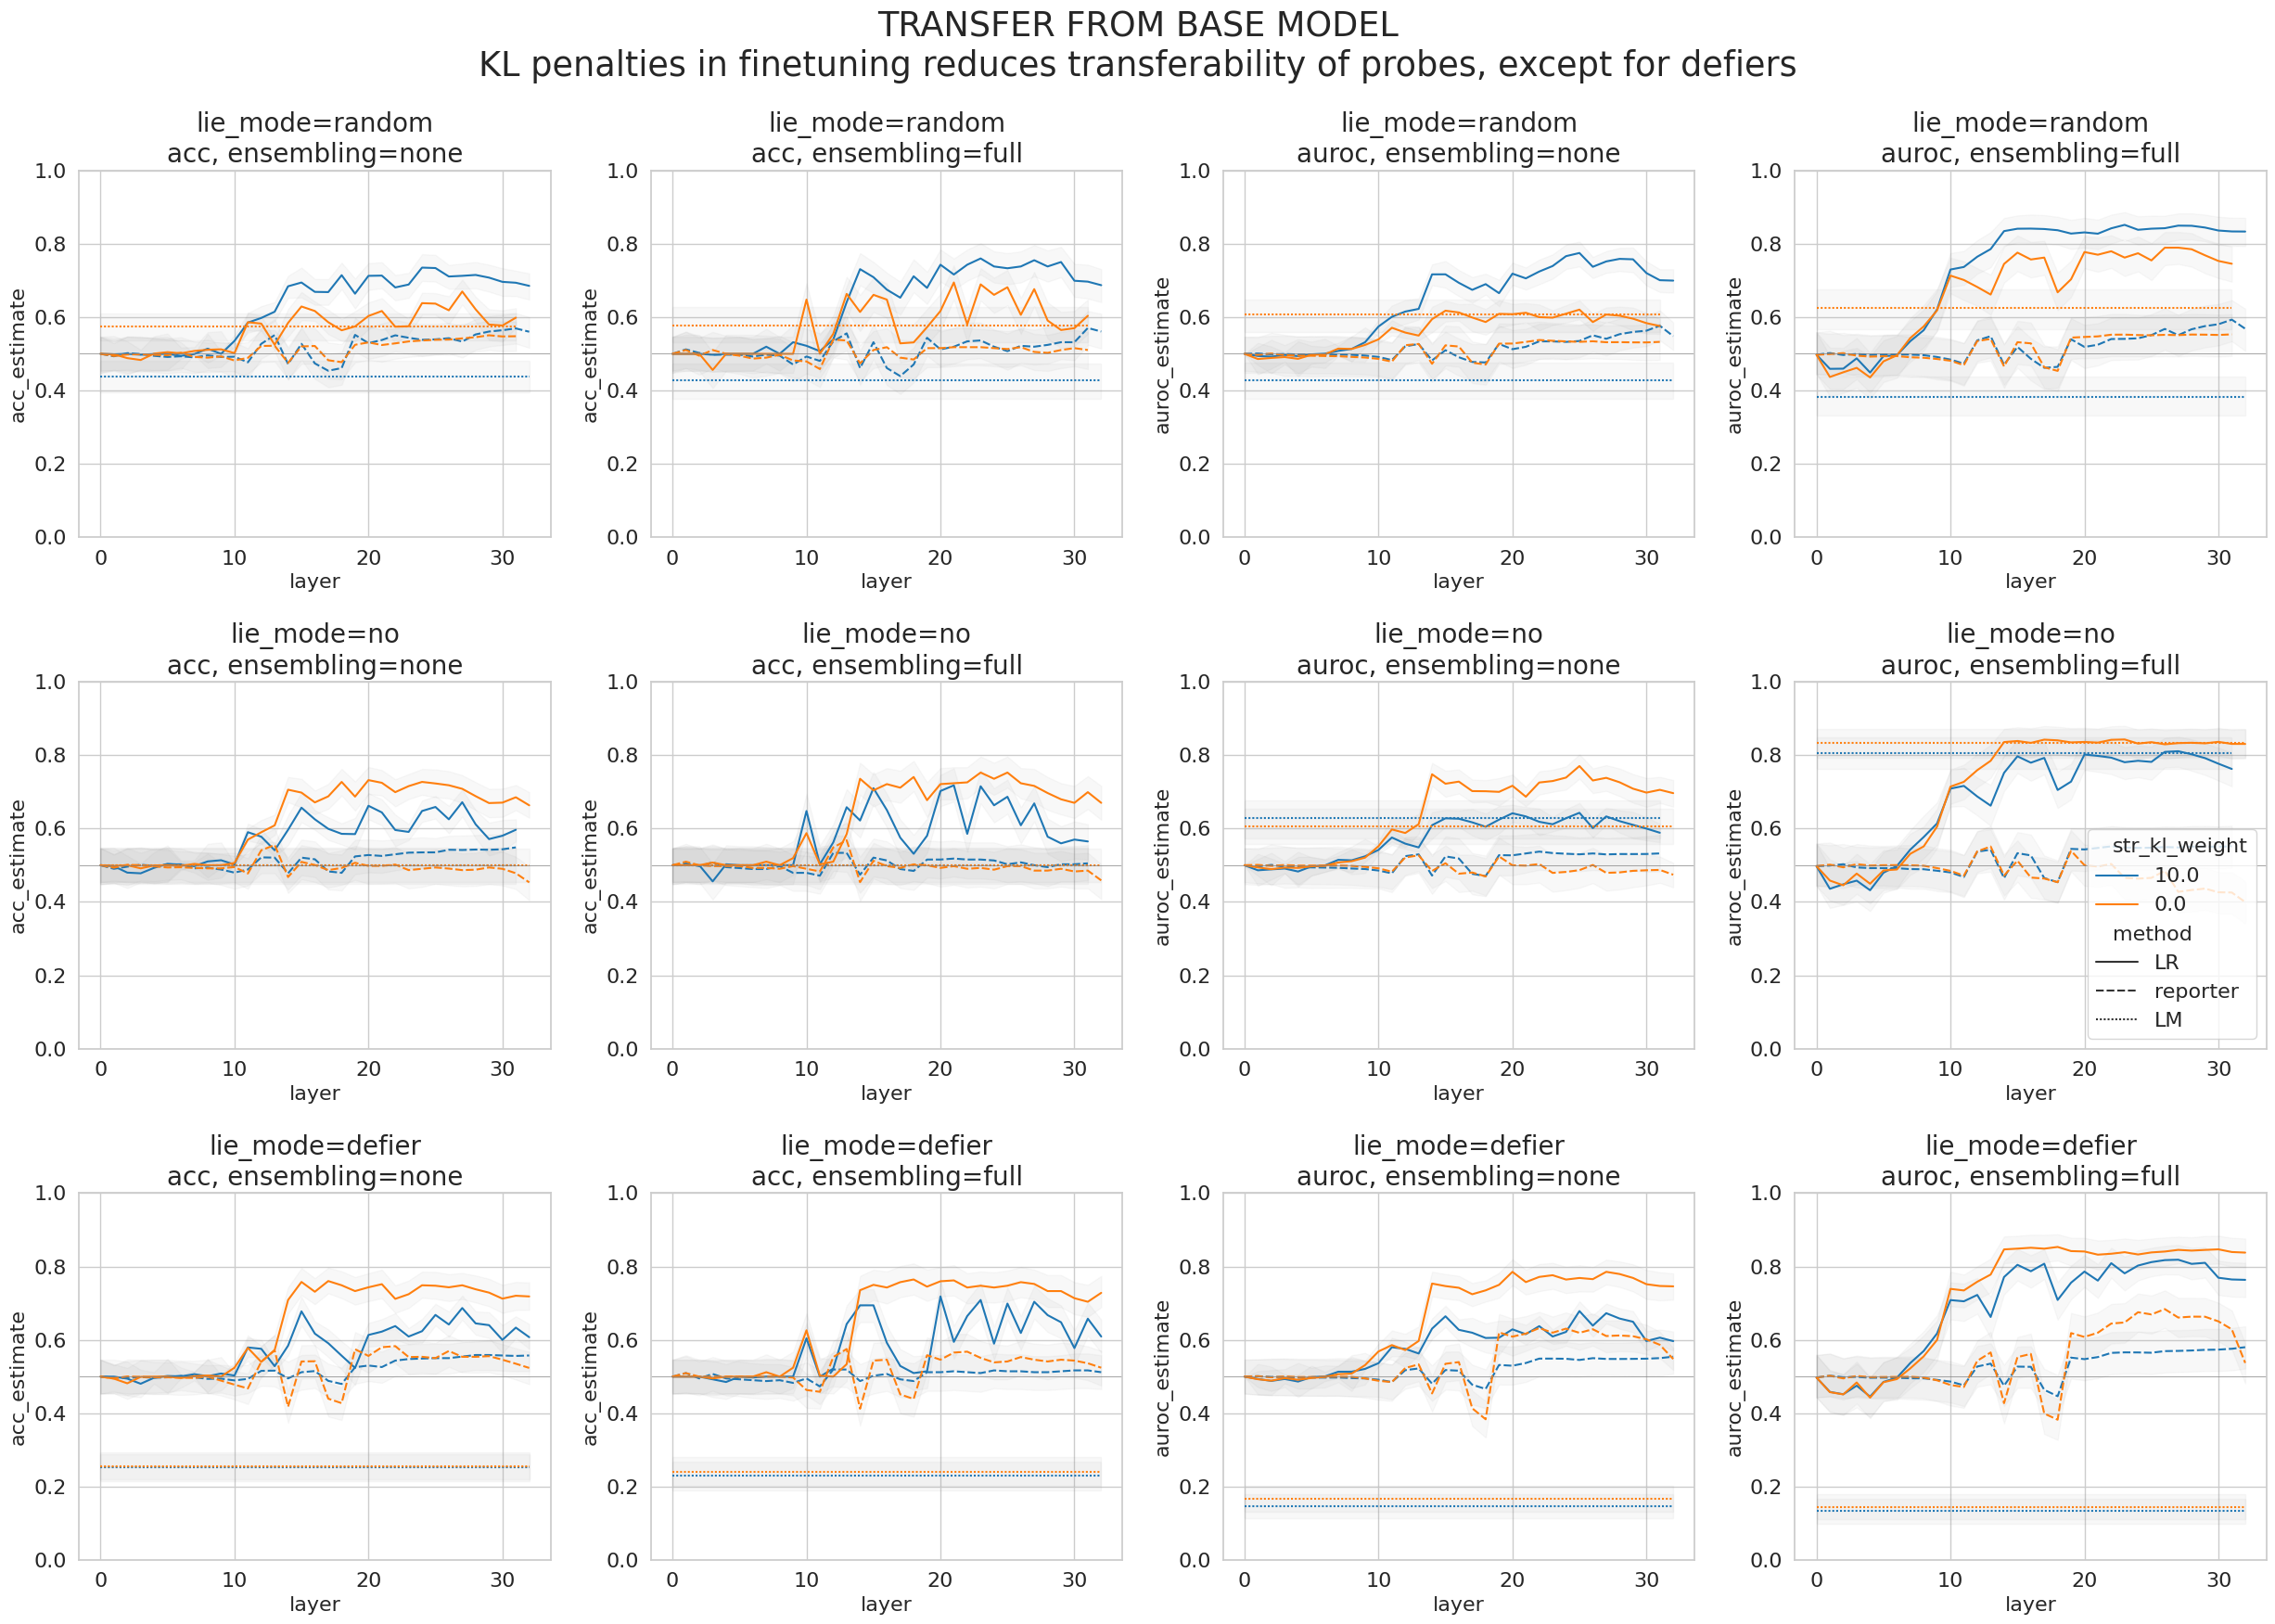

In [19]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 2
lms = ["random", "no", "defier"]
kl_weights = [0, 10]
versions = {(lm, kl): get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": kl, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": 1}) for lm in lms for kl in kl_weights}
sns.set_palette("tab10")

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 18))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(3, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="str_kl_weight", errorbar=None, style="method", legend=i==3 and j==1)
        for method in methods:
            for kl in kl_weights:
                sub_df = df[(df["method"] == method) & (df["kl_weight"] == kl)]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "KL penalties in finetuning reduces transferability of probes, except for defiers")

plt.tight_layout()
plt.show()

VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778393
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/cndetqb0
lora_rank=256; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1


VERSION: 1690778333
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778461
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/3ln9ftxf
lora_rank=256; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778362
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pwisuwtq
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=defier; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778474
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/n2qmwqgr
lora_rank=256; objective=standard; kl_weight=0.0; lie_mo

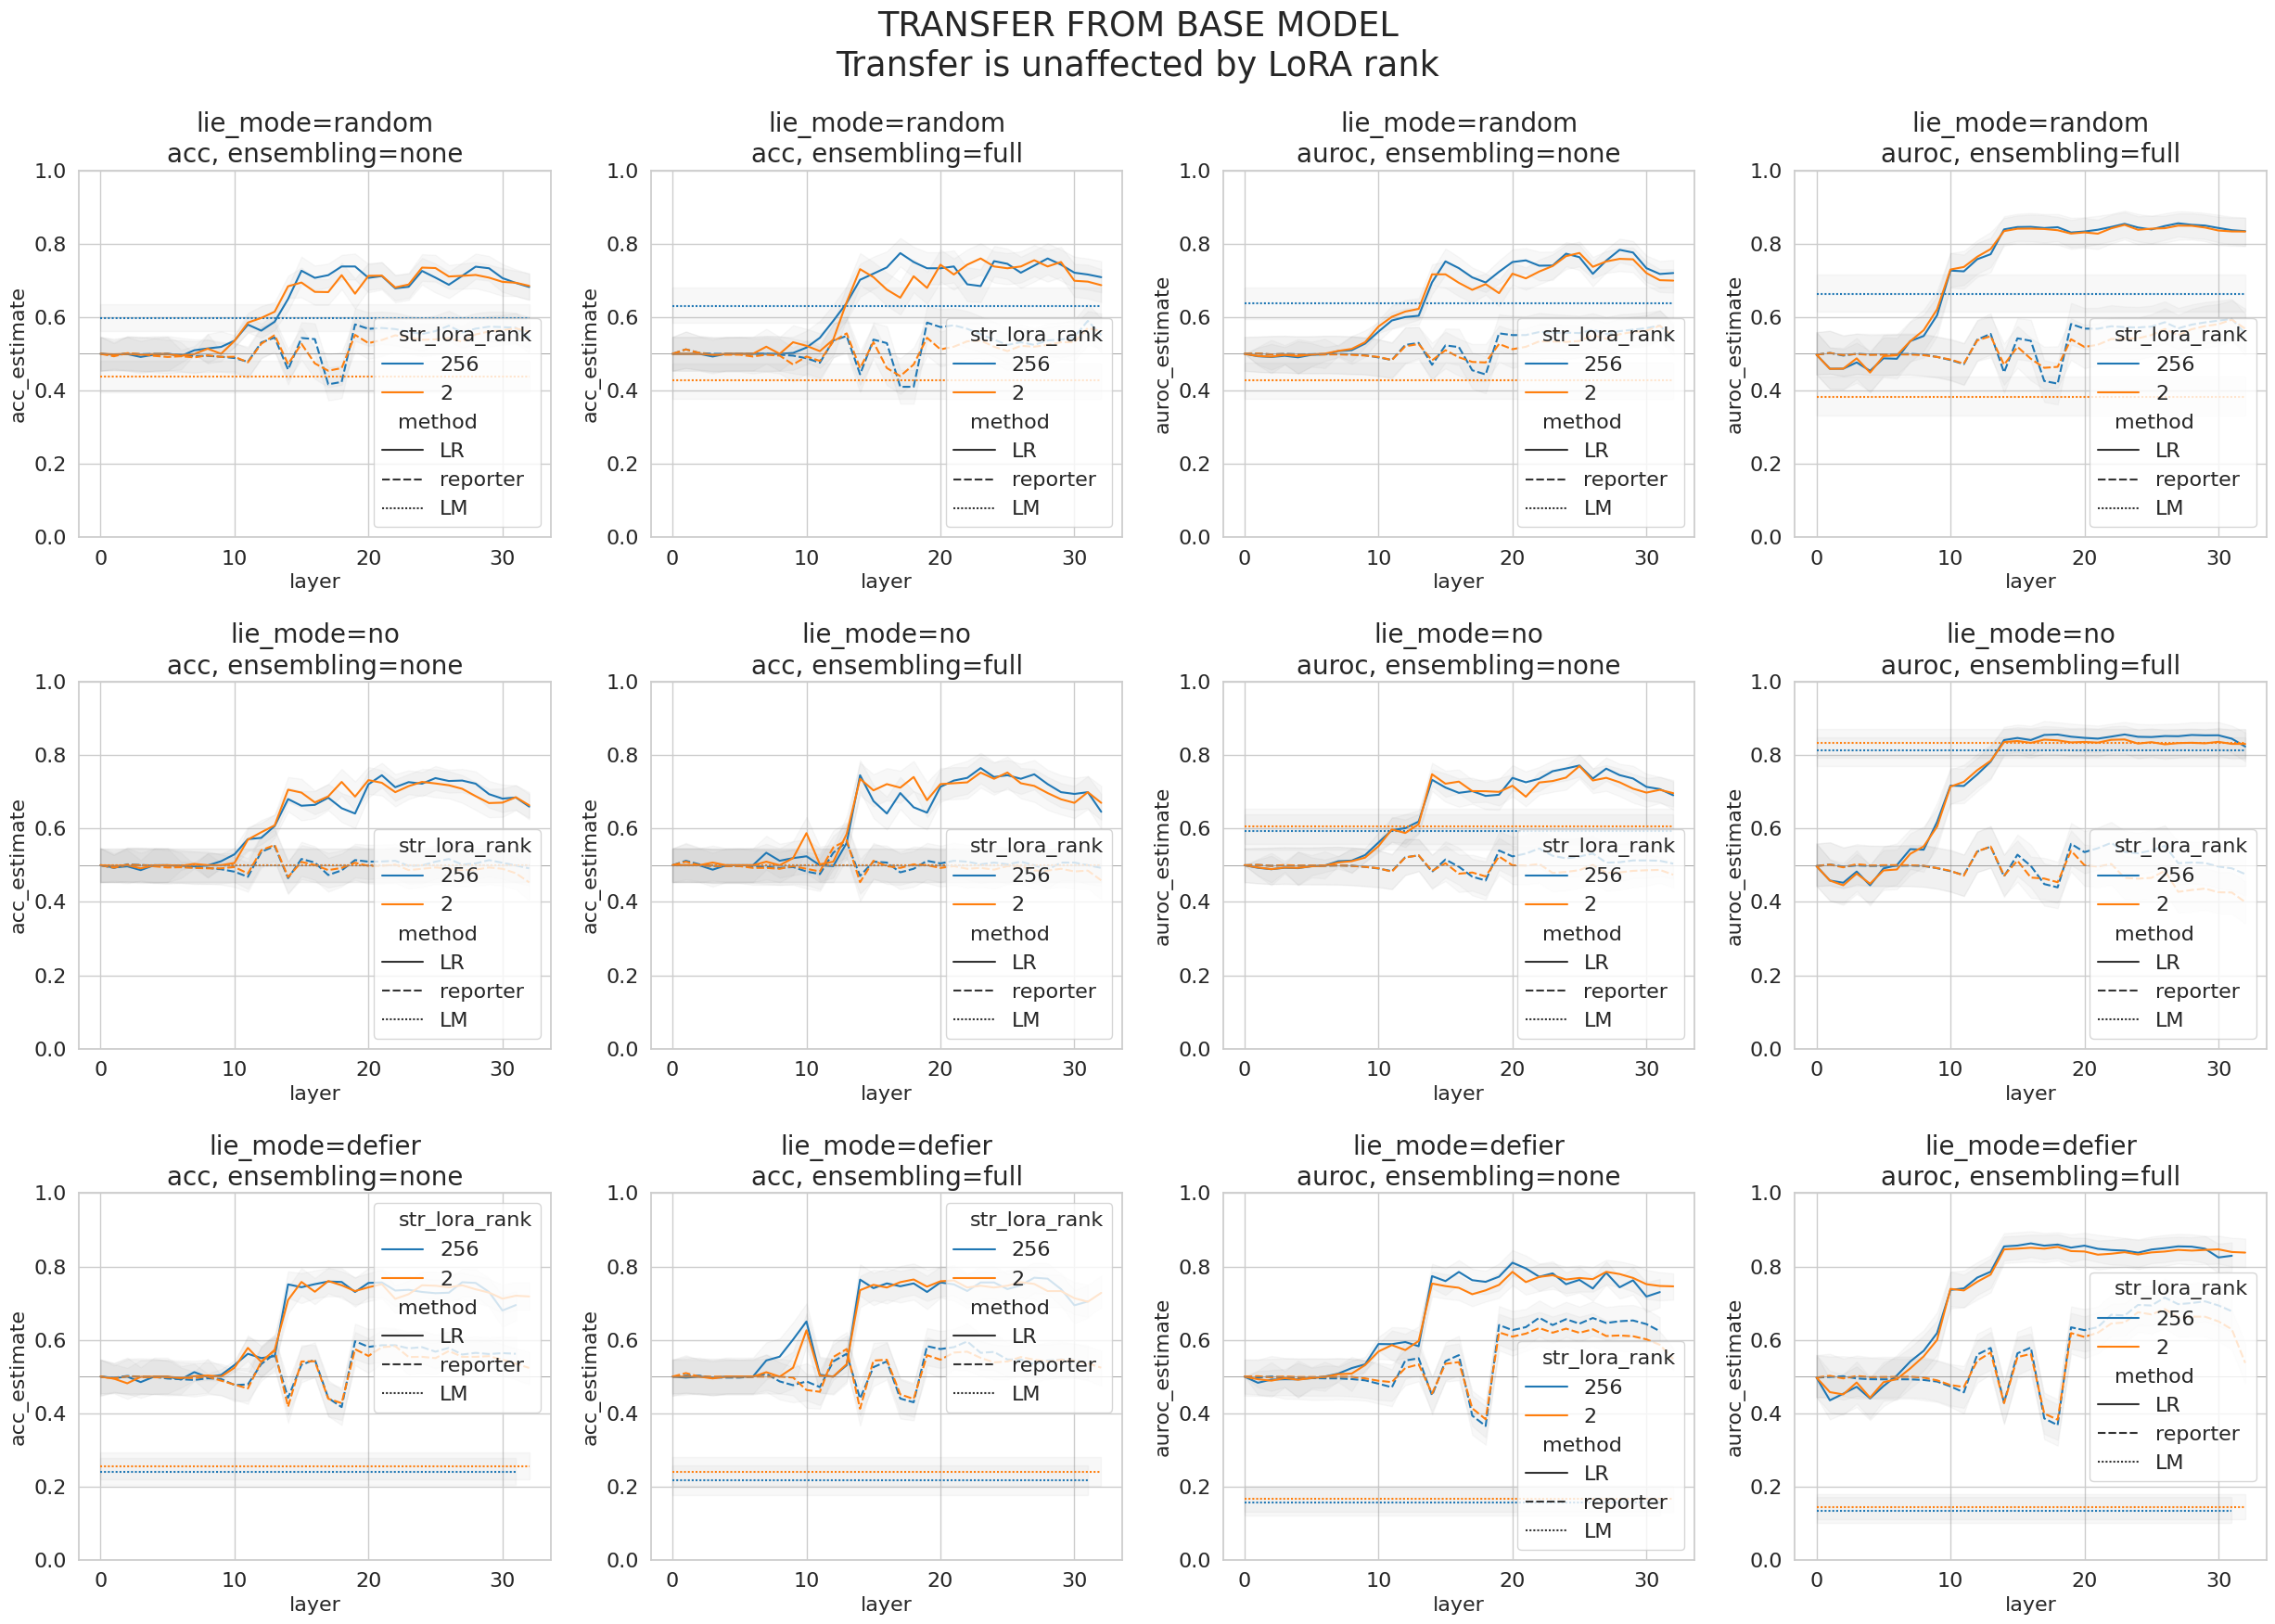

In [20]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 3
lms = ["random", "no", "defier"]
ranks = [2, 256]
versions = {(lm, rank): get_version_by_params(all_configs, {"lora_rank": rank, "kl_weight": 0, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": 1}) for lm in lms for rank in ranks}

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 18))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(3, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="str_lora_rank", errorbar=None, style="method")
        for method in methods:
            for rank in ranks:
                sub_df = df[(df["method"] == method) & (df["lora_rank"] == rank)]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "Transfer is unaffected by LoRA rank")

plt.tight_layout()
plt.show()

VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690778613
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/375835tg
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['query_key_value']; n_epochs=1
VERSION: 1690778555
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/f09kg5rr
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h']; n_epochs=1
VERSION: 1690778362
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pwisuwtq
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=defier; target_modules=['dense_h_to_4h', 'dens

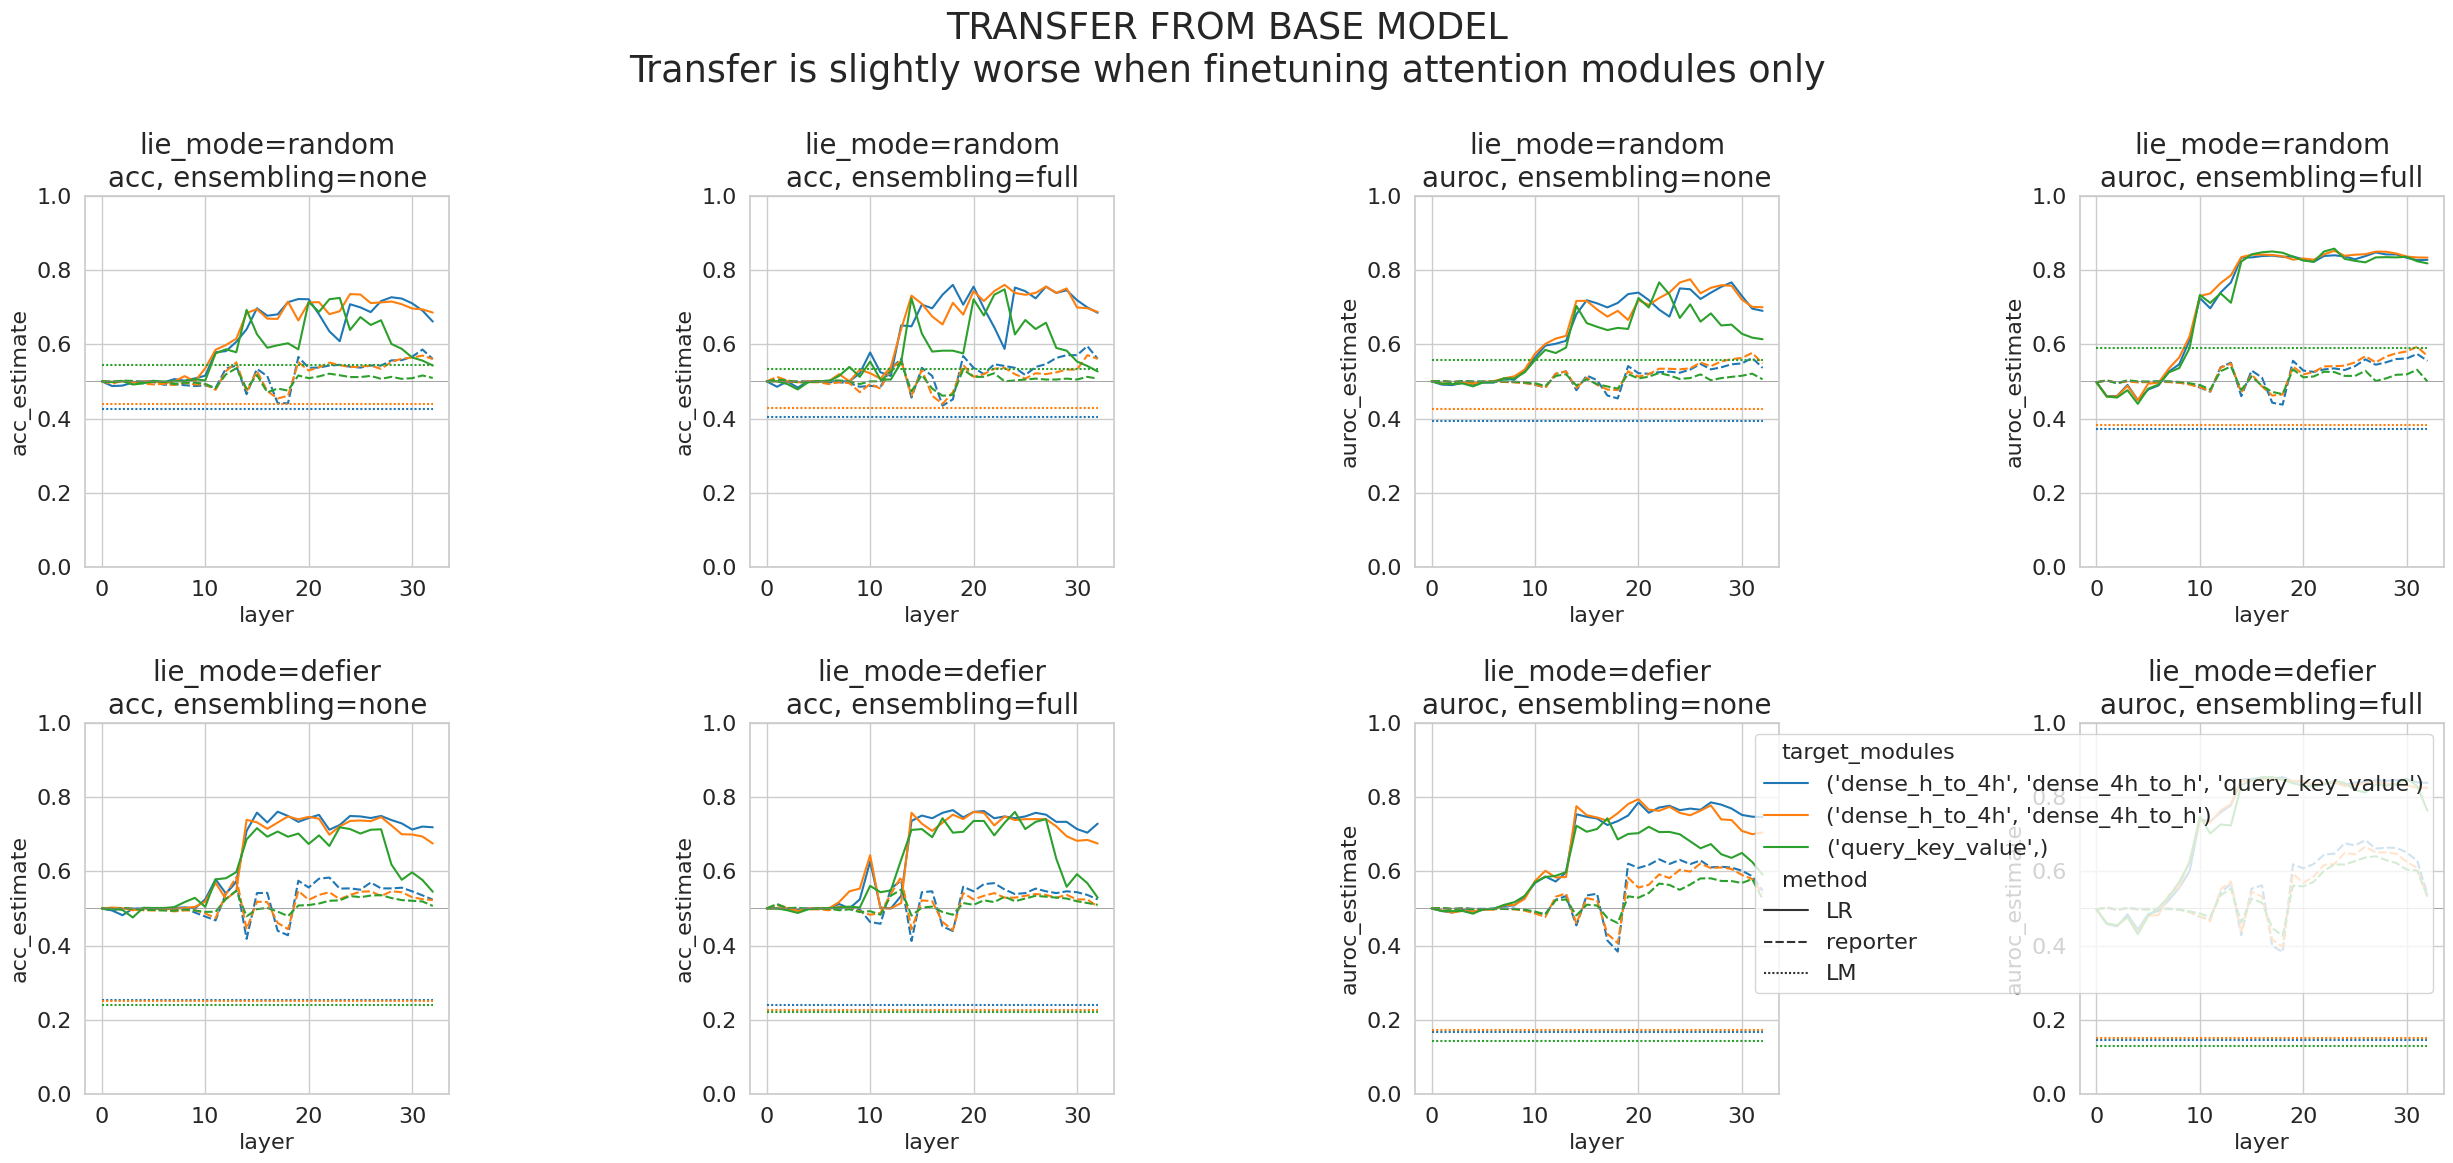

In [21]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 4
lms = ["random", "defier"]
mods = {"all": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "qkv": ["query_key_value"], "mlp": ["dense_h_to_4h", "dense_4h_to_h"]}
versions = {(lm, mod): get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": 0, "target_modules": mods[mod], "lie_mode": lm, "n_epochs": 1}) for lm in lms for mod in mods}

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 12))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(2, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="target_modules", errorbar=None, style="method", legend=i==3 and j==1)
        for method in methods:
            for mod_name, mod in mods.items():
                sub_df = df[(df["method"] == method) & (df["target_modules"].equals(mod))]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "Transfer is slightly worse when finetuning attention modules only")


plt.tight_layout()
plt.show()

VERSION: 1690778323
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/pd4nfapi
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690783068
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/h902iq4u
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=random; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=5
VERSION: 1690778333
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/uk1aojdz
lora_rank=2; objective=standard; kl_weight=0.0; lie_mode=no; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1690783029
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/xrotrrj5
lora_rank=2; objective=standard; kl_weight=0.0; lie_mo

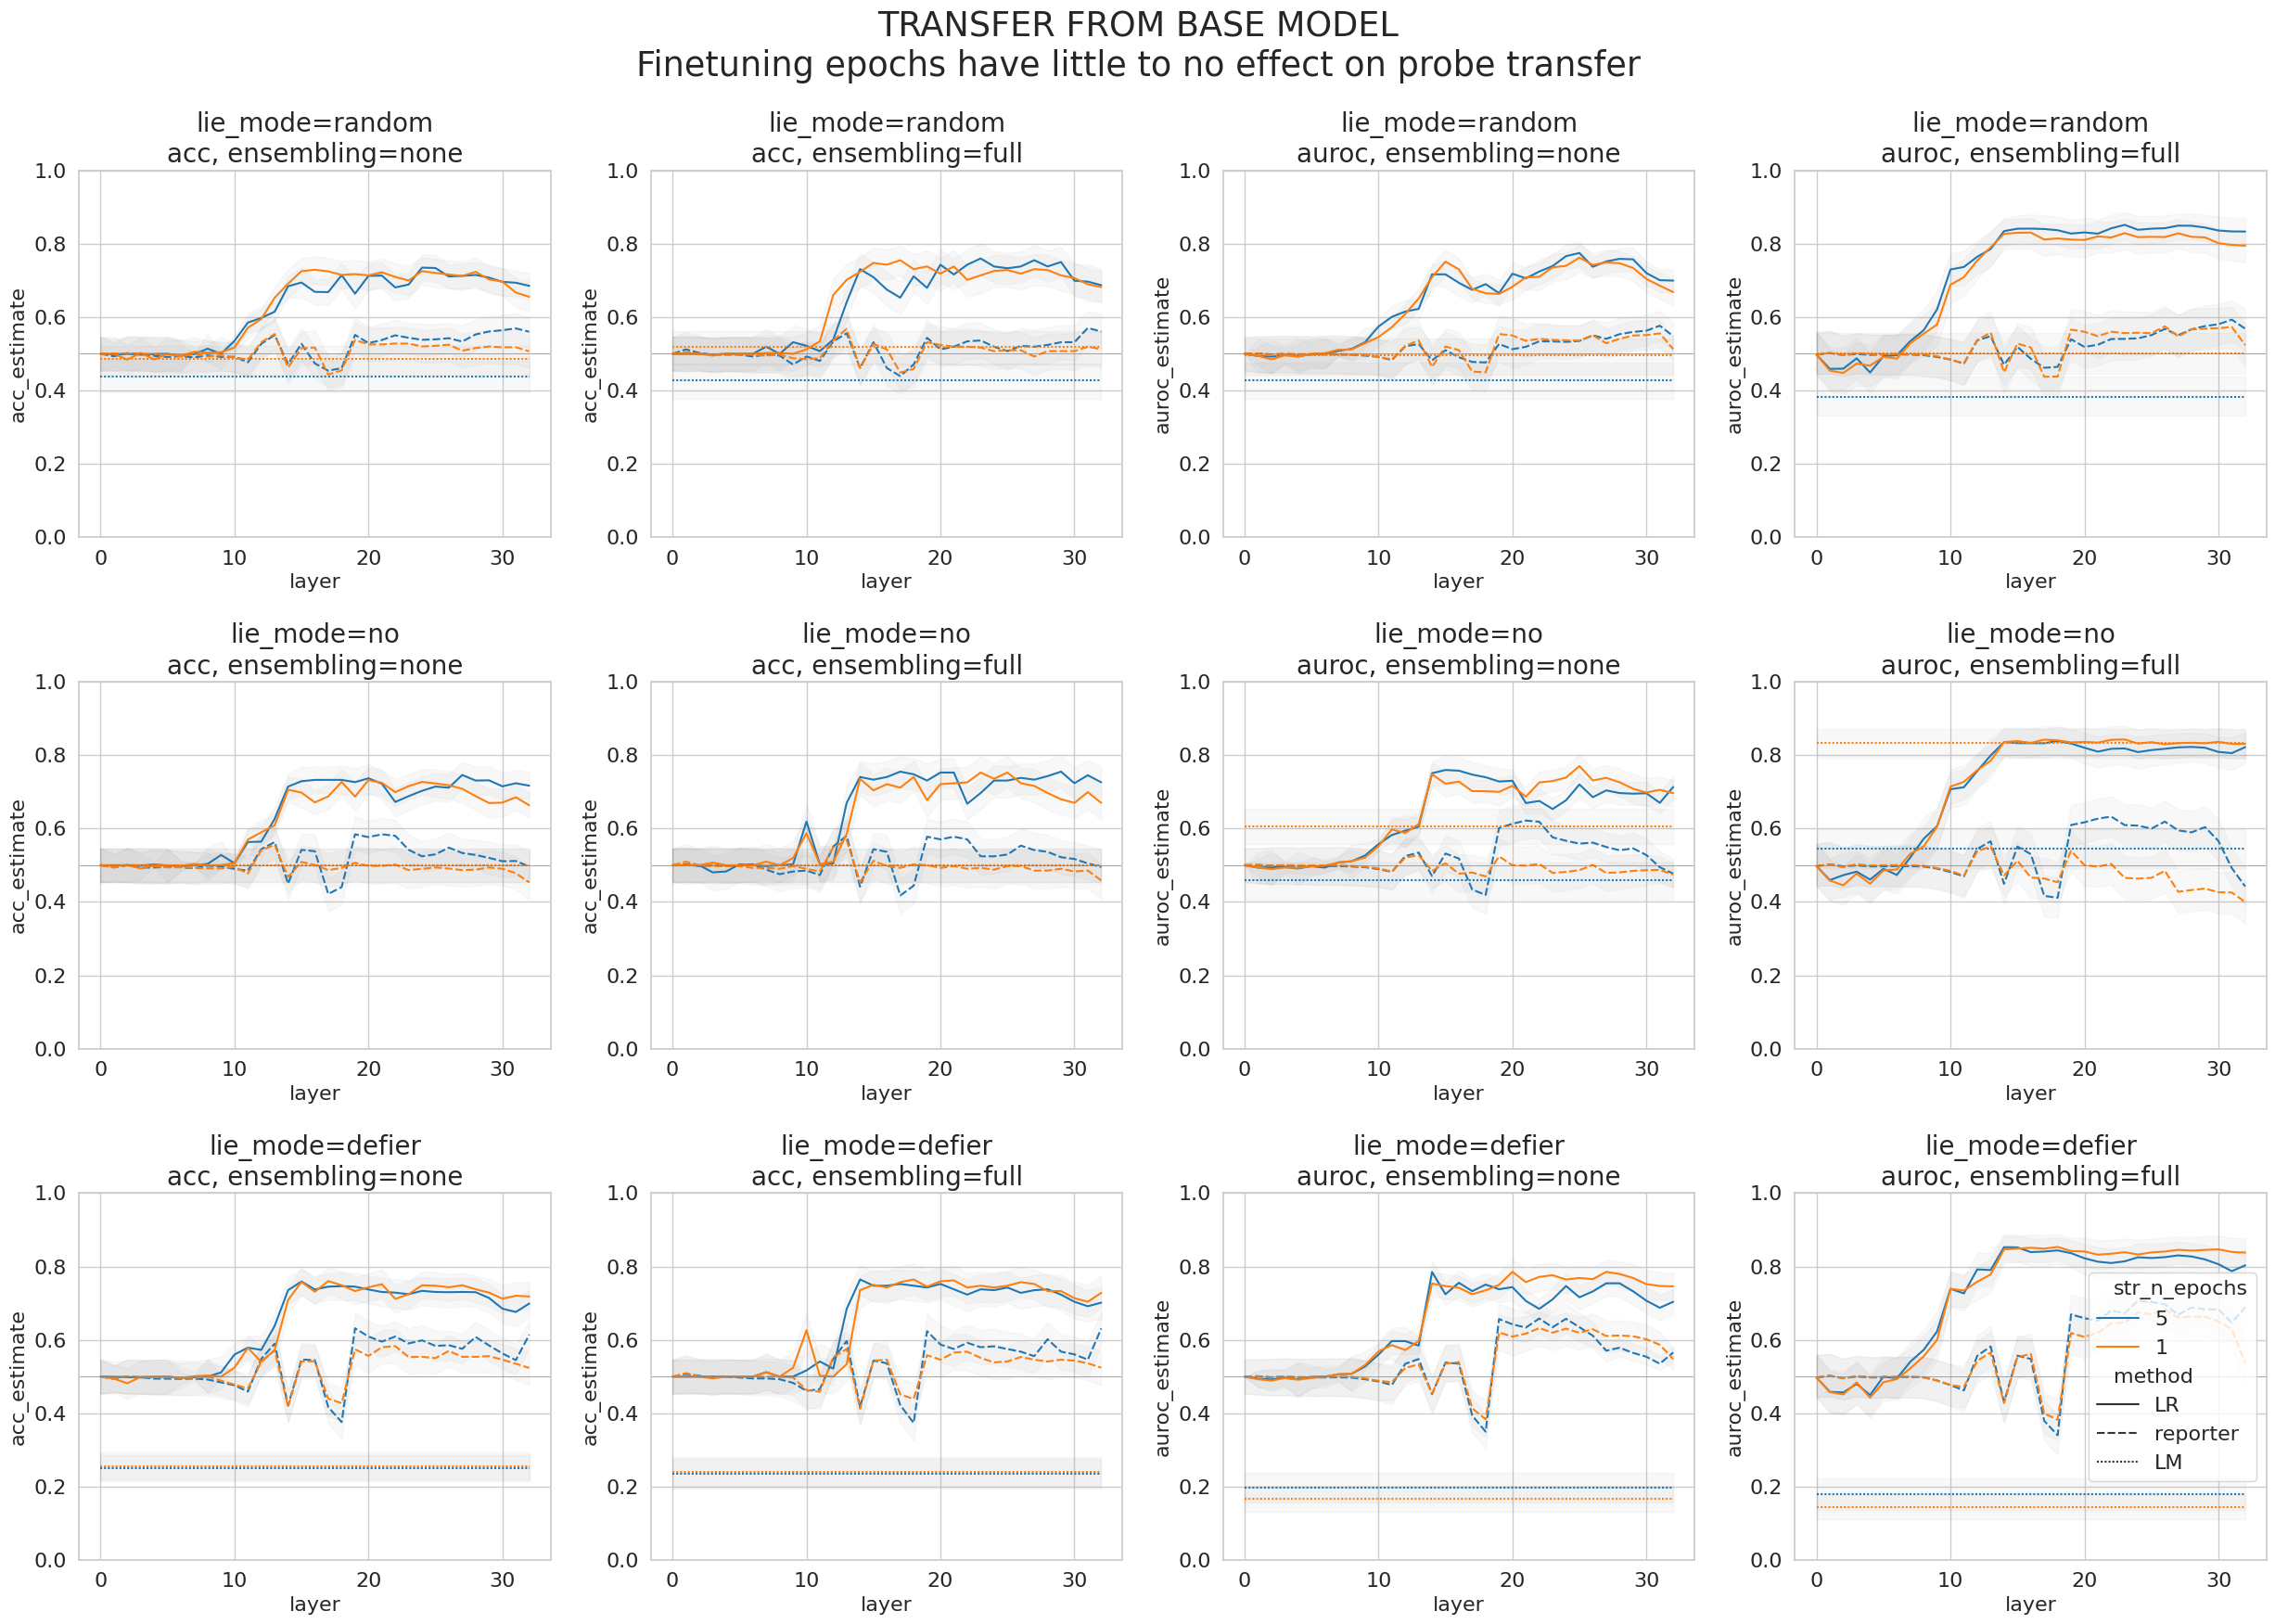

In [22]:

# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 5
lms = ["random", "no", "defier"]
epochs = [1, 5]
versions = {(lm, ep): get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": 0, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": lm, "n_epochs": ep}) for lm in lms for ep in epochs}

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)

plt.figure(figsize=(25, 18))
for i, combo in enumerate(combinations):
    metric, ens = combo
    for j, lm in enumerate(lms):
        plt.subplot(3, 4, 4 * j + i + 1)
        df = master_df[master_df["ensembling"] == ens]
        df = df[df["transfer_from_base"] == transfer_from_base]
        df = df[df["version"].isin(versions.values())]
        df = df[df["lie_mode"] == lm]
        # # average over layers 10 on
        # df = df[df["layer"] >= 10]
        # df = df.groupby(["version", "lie_mode", "method"]).mean().reset_index()
        sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="str_n_epochs", errorbar=None, style="method", legend=i==3 and j==2)
        for method in methods:
            for ep in epochs:
                sub_df = df[(df["method"] == method) & (df["n_epochs"] == ep)]
                plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color="grey")
        plt.title(f"lie_mode={lm}\n{metric}, ensembling={ens}")
        plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
        plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "Finetuning epochs have little to no effect on probe transfer")


plt.tight_layout()
plt.show()

VERSION: 1691386695
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/wuxgpc5u
lora_rank=2; objective=pretraining_KL+standard; kl_weight=0.1; lie_mode=defier; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1691427566
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/8hsp5w22
lora_rank=2; objective=pretraining_KL+standard; kl_weight=0.3; lie_mode=defier; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1
VERSION: 1691386001
transfer from reporter trained on base model
https://wandb.ai/latent-knowledge/weak-deception/runs/xnsn21d2
lora_rank=2; objective=pretraining_KL+standard; kl_weight=1.0; lie_mode=defier; target_modules=['dense_h_to_4h', 'dense_4h_to_h', 'query_key_value']; n_epochs=1


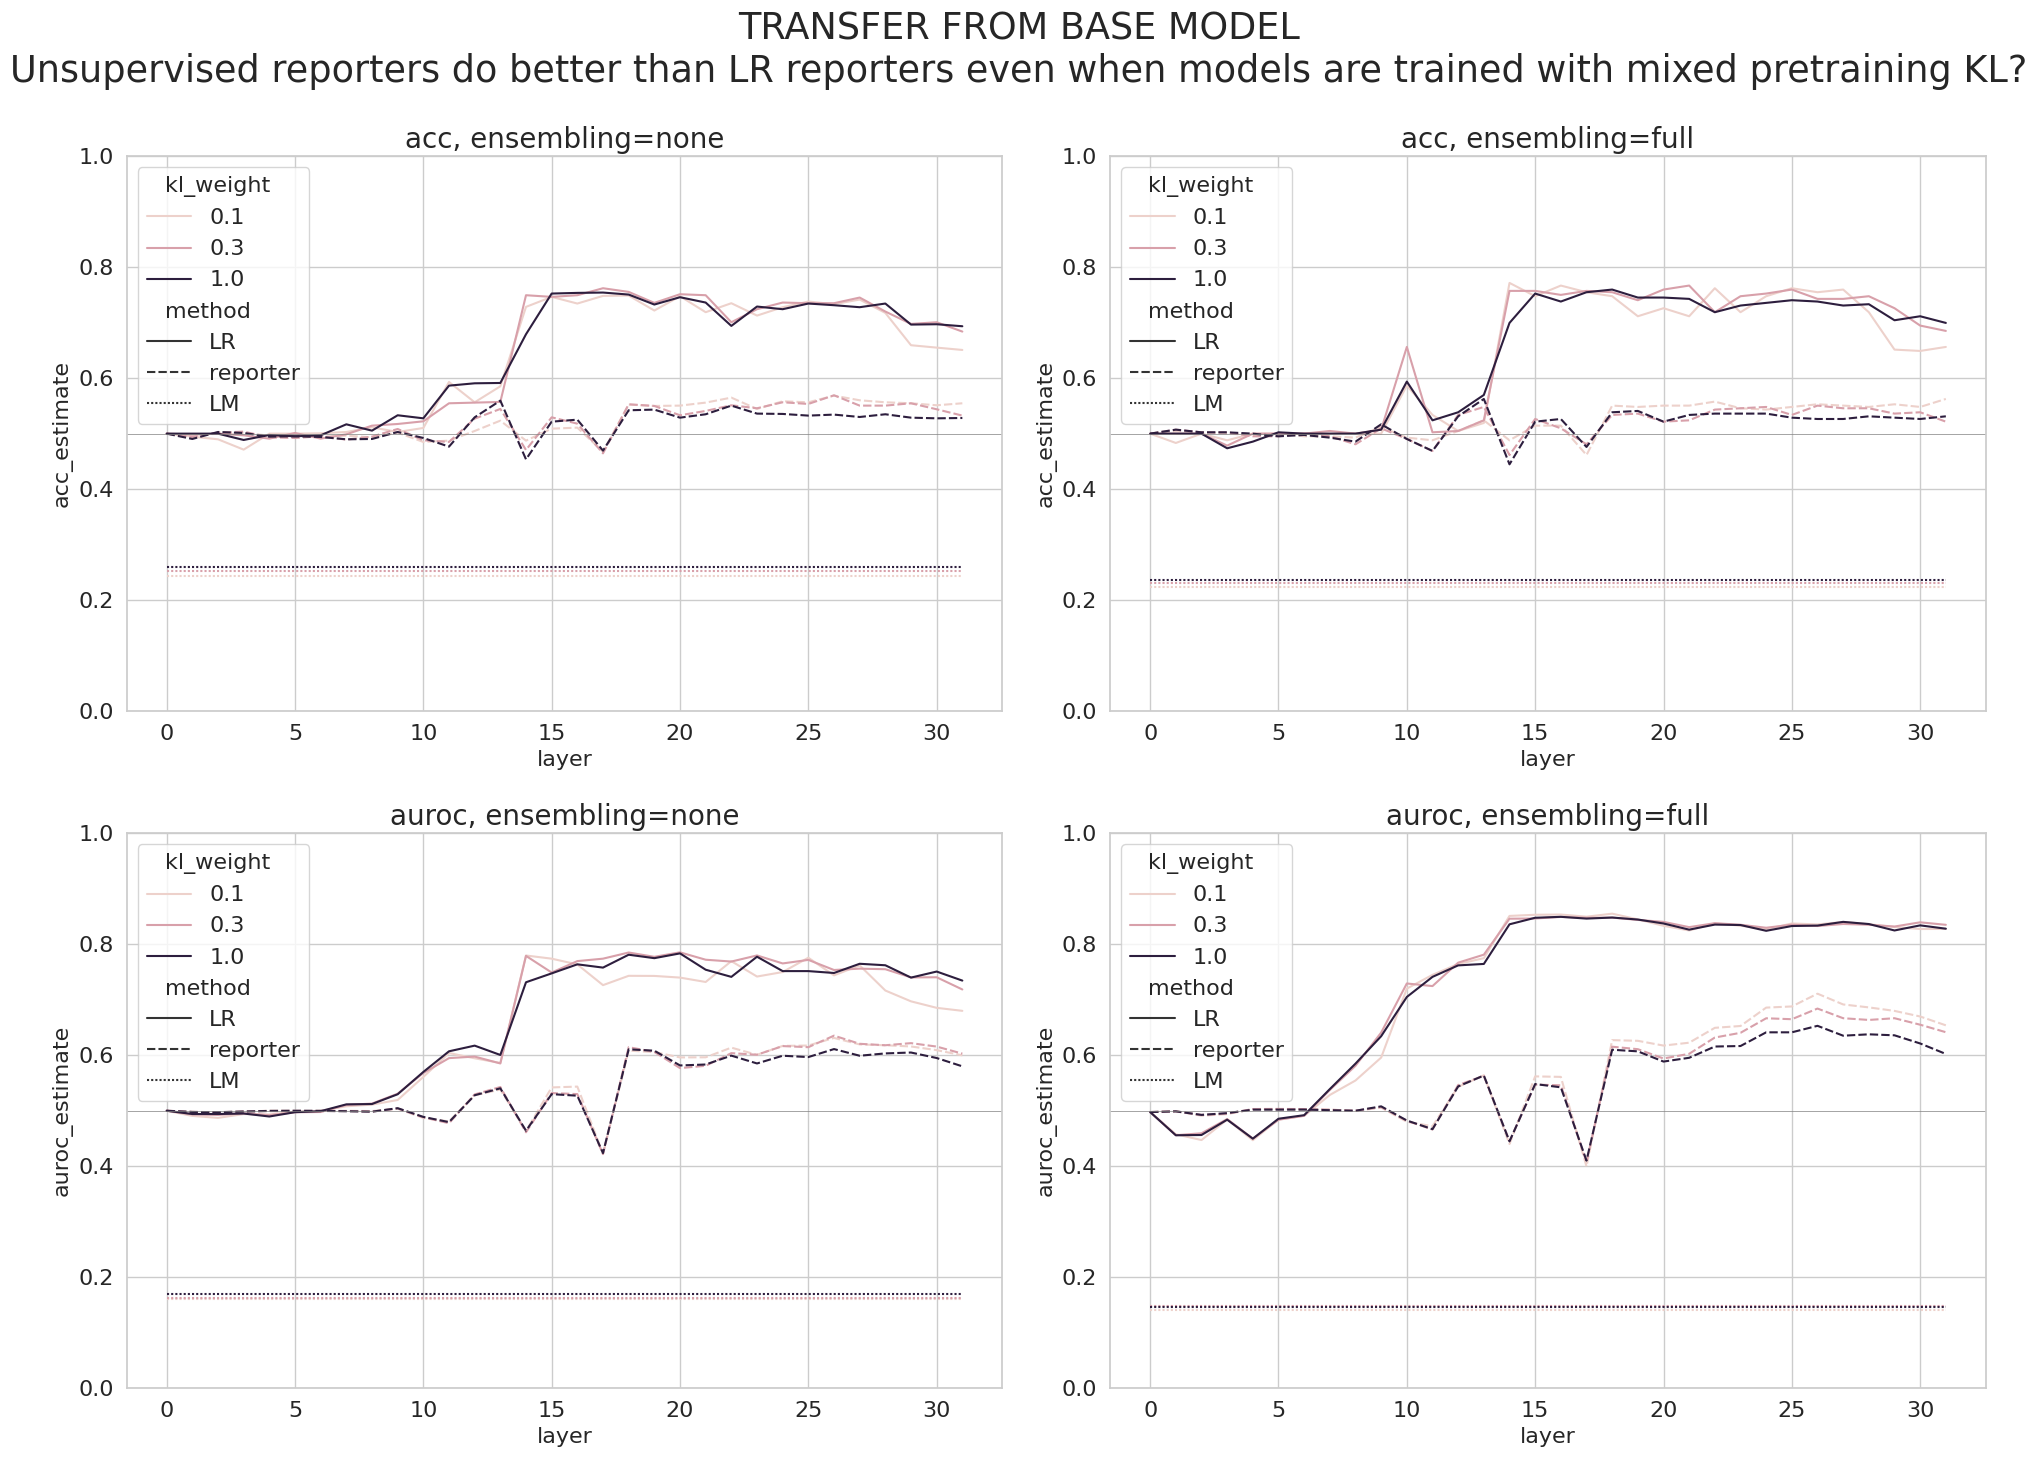

In [51]:
# Variables
# lora-rank  2, 256
# kl-weight  0, 10
# target-modules  ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"],  ["query_key_value"], ["dense_h_to_4h", "dense_4h_to_h"]
# lie-mode "random", "no", "yes", "defier"
# n-epochs 1, 5

# 1. show main results for 2, 0, ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], x, 1 for each of the four lie modes as hues
# 2. compare to using a kl-weight of 10, showing that this doesn't matter much (mention the effect on pretraining loss, and lack of efficacy in maintaining fluency)
# 3. compare the lora ranks
# 4. compare the different target modules
# 5. compare the different n-epochs
# 6. compare to probes trained on the base model (redo all of above)

# finally, redo this whole thing for each of the four combinations of (auroc, acc) x (no ensemble, full ensemble)

# 1
lms = [0.1, 0.3, 1]
# "objective":"pretraining_KL+standard"
versions = {lm: get_version_by_params(all_configs, {"lora_rank": 2, "kl_weight": lm, "target_modules": ["dense_h_to_4h", "dense_4h_to_h", "query_key_value"], "lie_mode": "defier", "n_epochs": 1, "objective":"pretraining_KL+standard"}) for lm in lms}
styles = {"LR": "-", "LM": "..", "reporter": "--"}
colors = {"random": "green", "no": "red", "defier": "blue", "yes": "indigo"}
sns.set_palette(sns.color_palette(colors.values()))

for version in versions.values():
    maybe_trans = 'transfer from reporter trained on base model\n' if transfer_from_base else ''
    child, config = version_to_run_config(version)
    cfg_str = get_cfg_str(config)
    wandb_url = get_url(child)
    caption = f"VERSION: {version}\n{maybe_trans}{wandb_url}\n{cfg_str}"
    print(caption)


plt.figure(figsize=(20, 15))
for i, combo in enumerate(combinations):
    metric, ens = combo
    plt.subplot(2, 2, i + 1)
    df = master_df[master_df["ensembling"] == ens]
    df = df[df["transfer_from_base"] == transfer_from_base]
    df = df[df["version"].isin(versions.values())]
    sns.lineplot(data=df, x="layer", y=f"{metric}_estimate", hue="kl_weight", errorbar=None, style="method", hue_order=lms)
    # for method in methods:
    #     for j, lm in enumerate(lms):
    #         sub_df = df[(df["method"] == method) & (df["lie_mode"] == lm)]
    #         plt.fill_between(sub_df["layer"], sub_df[f"{metric}_lower"], sub_df[f"{metric}_upper"], alpha=0.05, color=colors[lm])
    plt.title(f"{metric}, ensembling={ens}")
    plt.axhline(y=0.5, color="grey", linestyle="-", linewidth=0.5)
    plt.ylim([0.0, 1.0])

suptitle_prefix = "TRANSFER FROM BASE MODEL\n" if transfer_from_base else ""
plt.suptitle(suptitle_prefix + "Unsupervised reporters do better than LR reporters even when models are trained with mixed pretraining KL?")

plt.tight_layout()
plt.show()




In [39]:
sub_df

ensembling  inlp_iter            dataset  layer  auroc_estimate   
0        full        NaN  atmallen/popqa_90      0          0.1483  \
3        full        NaN  atmallen/popqa_90      1          0.1483   
6        full        NaN  atmallen/popqa_90      2          0.1483   
9        full        NaN  atmallen/popqa_90      3          0.1483   
12       full        NaN  atmallen/popqa_90      4          0.1483   
..        ...        ...                ...    ...             ...   
81       full        NaN  atmallen/popqa_90     27          0.1483   
84       full        NaN  atmallen/popqa_90     28          0.1483   
87       full        NaN  atmallen/popqa_90     29          0.1483   
90       full        NaN  atmallen/popqa_90     30          0.1483   
93       full        NaN  atmallen/popqa_90     31          0.1483   

    auroc_lower  auroc_upper  cal_acc_estimate  cal_acc_lower  cal_acc_upper   
0        0.1127       0.1839            0.2308         0.1923          0.274  \
3        0.1127       0.1839            0.2308         0.1923          0.274   
6        0.1127       0.1839            0.2308         0.1923          0.274   
9        0.1127       0.1839            0.2308         0.1923          0.274   
12       0.1127       0.1839            0.2308         0.1923          0.274   
..          ...          ...               ...            ...            ...   
81       0.1127       0.1839            0.2308         0.1923          0.274   
84       0.1127       0.1839            0.2308         0.1923          0.274   
87       0.1127       0.1839            0.2308         0.1923          0.274   
90       0.1127       0.1839            0.2308         0.1923          0.274   
93       0.1127       0.1839            0.2308         0.1923          0.274   

    ...     version  kl_weight  lora_rank  n_epochs str_kl_weight   
0   ...  1691427566        0.3          2         1           0.3  \
3   ...  1691427566        0.3          2         1           0.3   
6   ...  1691427566        0.3          2         1           0.3   
9   ...  1691427566        0.3          2         1           0.3   
12  ...  1691427566        0.3          2         1           0.3   
..  ...         ...        ...        ...       ...           ...   
81  ...  1691427566        0.3          2         1           0.3   
84  ...  1691427566        0.3          2         1           0.3   
87  ...  1691427566        0.3          2         1           0.3   
90  ...  1691427566        0.3          2         1           0.3   
93  ...  1691427566        0.3          2         1           0.3   

    str_lora_rank  str_n_epochs   
0               2             1  \
3               2             1   
6               2             1   
9               2             1   
12              2             1   
..            ...           ...   
81              2             1   
84              2             1   
87              2             1   
90              2             1   
93              2             1   

                                     target_modules  lie_mode   
0   (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier  \
3   (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
6   (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
9   (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
12  (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
..                                              ...       ...   
81  (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
84  (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
87  (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
90  (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   
93  (dense_h_to_4h, dense_4h_to_h, query_key_value)    defier   

                  objective  
0   pretraining_KL+standard  
3   pretraining_KL+standard  
6   pretraining_KL+standard  
9   pretraining_KL+standard  
12  pretraining_KL+s